In [1]:
%matplotlib inline

import shm
import numpy
import networkx
import matplotlib
import seaborn as sns
import pandas as pd
import pickle
import pymc3 as pm

In [7]:
import arviz as az
import shm.plot as sp
import matplotlib.pyplot as plt
from shm.models.hlm import HLM

In [16]:
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 2)

Populating the interactive namespace from numpy and matplotlib


/home/simon/miniconda3/envs/ml/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['trace']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Small models

In [9]:
readout_file = "../data_raw/easy_simulated_data/small-simulated_data.tsv"
graph_file = "../data_raw/easy_simulated_data/small-graph.tsv"
data_file = "../data_raw/easy_simulated_data/small-data.pickle"

In [10]:
def _read_graph(infile, data):    
    genes = numpy.unique(data["gene"].values)
    G = networkx.read_edgelist(
      infile,
      delimiter="\t",
      data=(('weight', float),),
      nodetype=str)
    G = G.subgraph(numpy.sort(genes))
    data = data[data.gene.isin(numpy.sort(G.nodes()))]
    return G, data

## Small simple model

In [4]:
trace_dir = "../results/small_simple_model_trace"

In [6]:
with open(data_file, "rb") as fh:    
    data = pickle.load(fh)

In [7]:
readout = pd.read_csv(readout_file, sep="\t")
graph, _ = _read_graph(graph_file, readout)

/home/simon/miniconda3/envs/ml/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


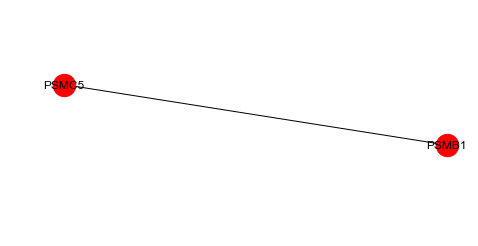

In [8]:
networkx.draw(graph, node_size=500, with_labels=True)

In [18]:
with HLM(readout) as model:
    trace = pm.load_trace(trace_dir, model = model.model)

Building simple hierarchical model


In [17]:
sp.plot_hist(trace, "gamma", 0, "");

AttributeError: 'function' object has no attribute 'nchains'

In [ ]:
sp.plot_hist(trace, "gamma", 1, "");

In [12]:
data['gamma_essential']

array([-0.59391366])

In [13]:
data['gamma_nonessential']

array([-0.06117564])

In [16]:
numpy.mean(trace['gamma'], 0)

array([-0.18657483, -0.51394251])

In [15]:
model._beta_idx_to_gene_cond.keys()

dict_keys([5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

In [16]:
data['beta']

array([-0.7259566 , -0.86215581, -0.37756175, -1.16929833, -0.15771072,
       -0.25147737,  0.01858413, -0.12351824,  0.30435134, -0.57621082])

In [25]:
list(model._beta_idx_to_gene_cond.keys())

[5, 6, 7, 8, 9, 0, 1, 2, 3, 4]

In [26]:
numpy.mean(trace['beta'], 0)[list(model._beta_idx_to_gene_cond.keys())]

array([-0.69303458, -0.83748557, -0.36598819, -1.13833843, -0.10865165,
       -0.22755621,  0.06793616, -0.16688222,  0.34094731, -0.56337918])

## Small clustering model

In [38]:
trace_dir = "../results/small_clustering_model_trace"

In [39]:
with open(data_file, "rb") as fh:    
    data = pickle.load(fh)

In [40]:
readout = pd.read_csv(readout_file, sep="\t")
graph, _ = _read_graph(graph_file, readout)

/home/simon/miniconda3/envs/ml/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


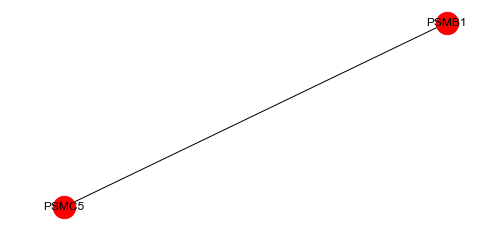

In [41]:
networkx.draw(graph, node_size=500, with_labels=True)

In [42]:
with HLM(readout, model="clustering") as model:
    trace = pm.load_trace(trace_dir, model = model.model)

Building cluster hierarchical model


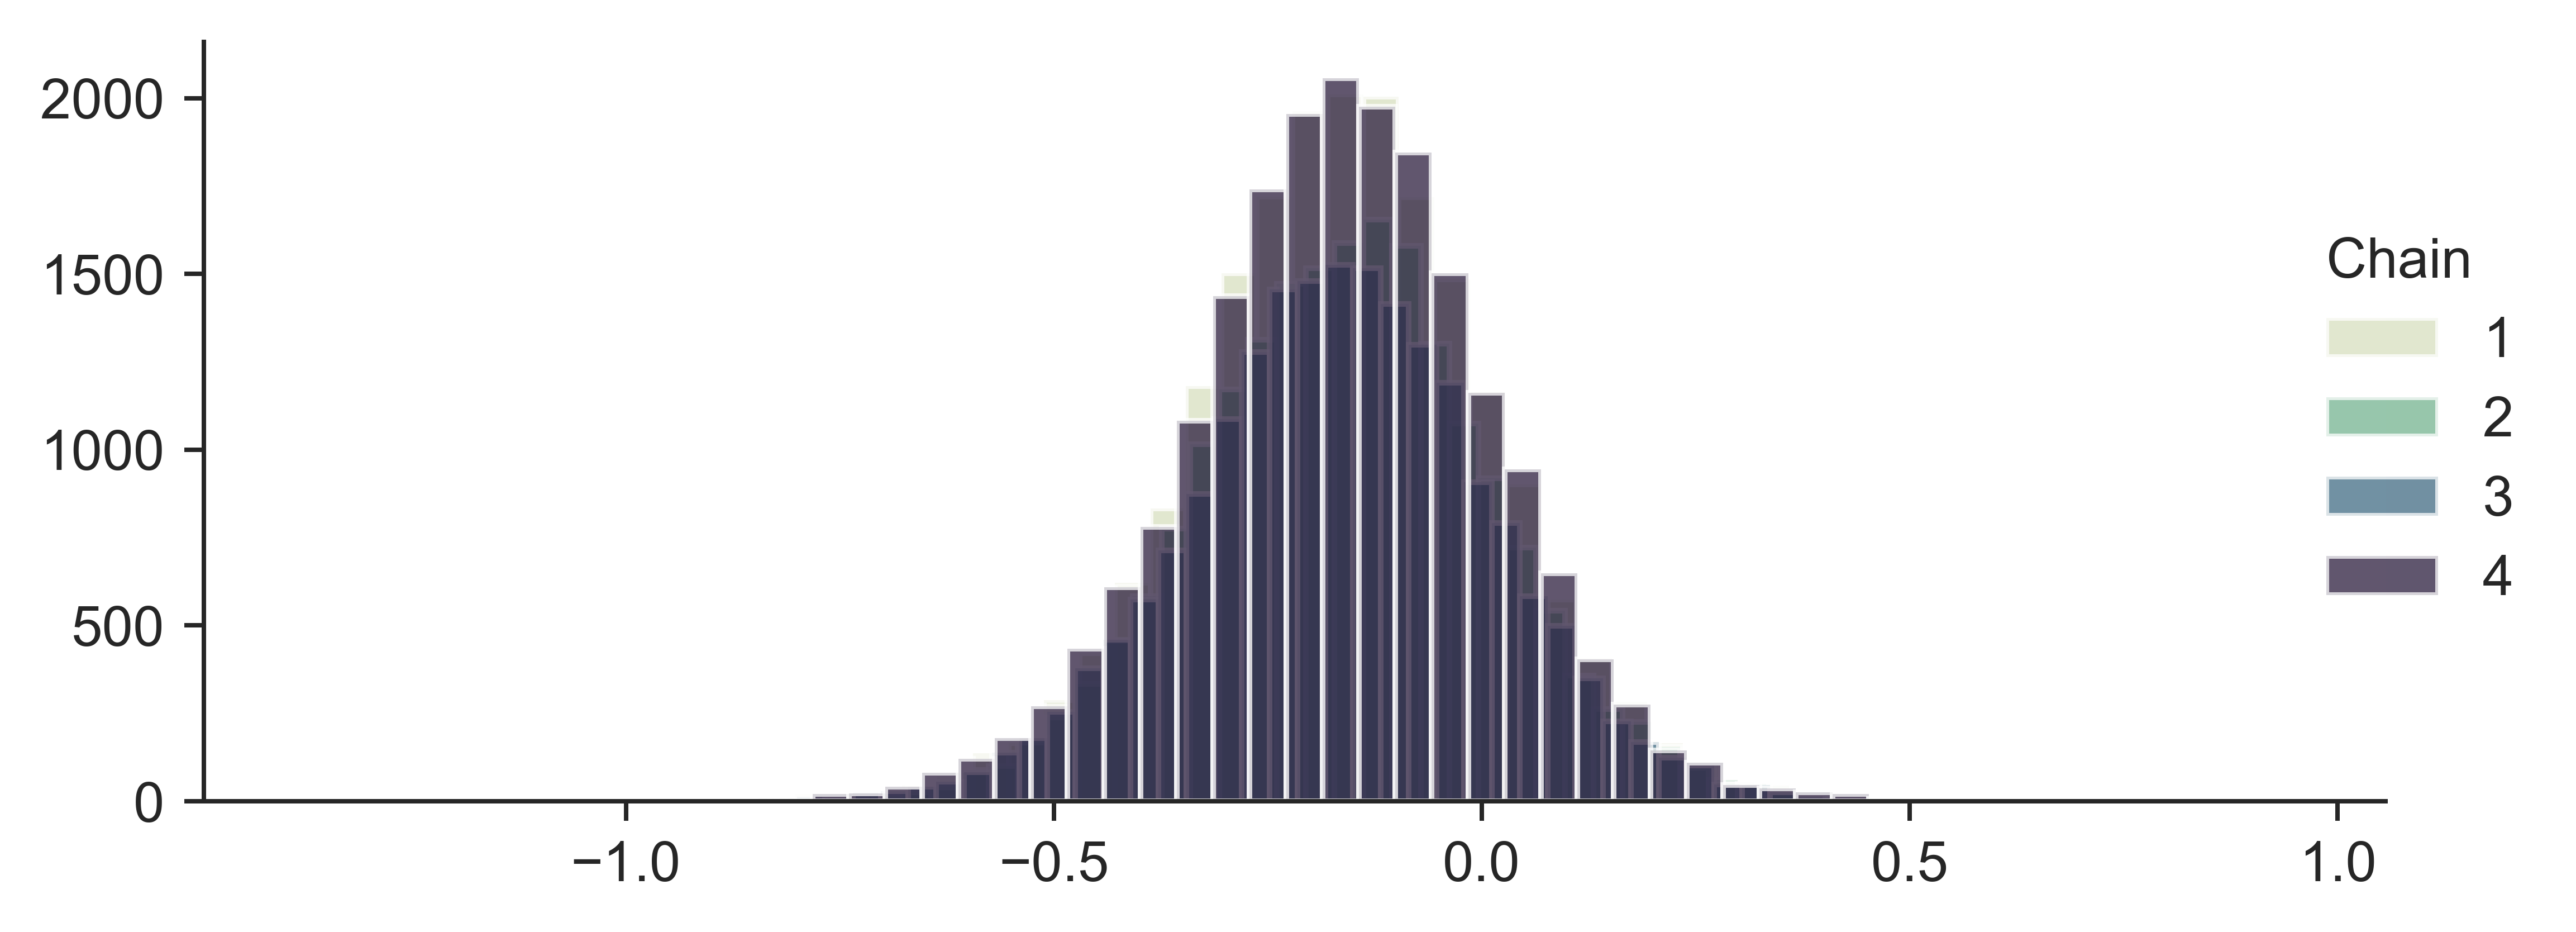

In [43]:
sp.plot_hist(trace, "gamma", 0, "");

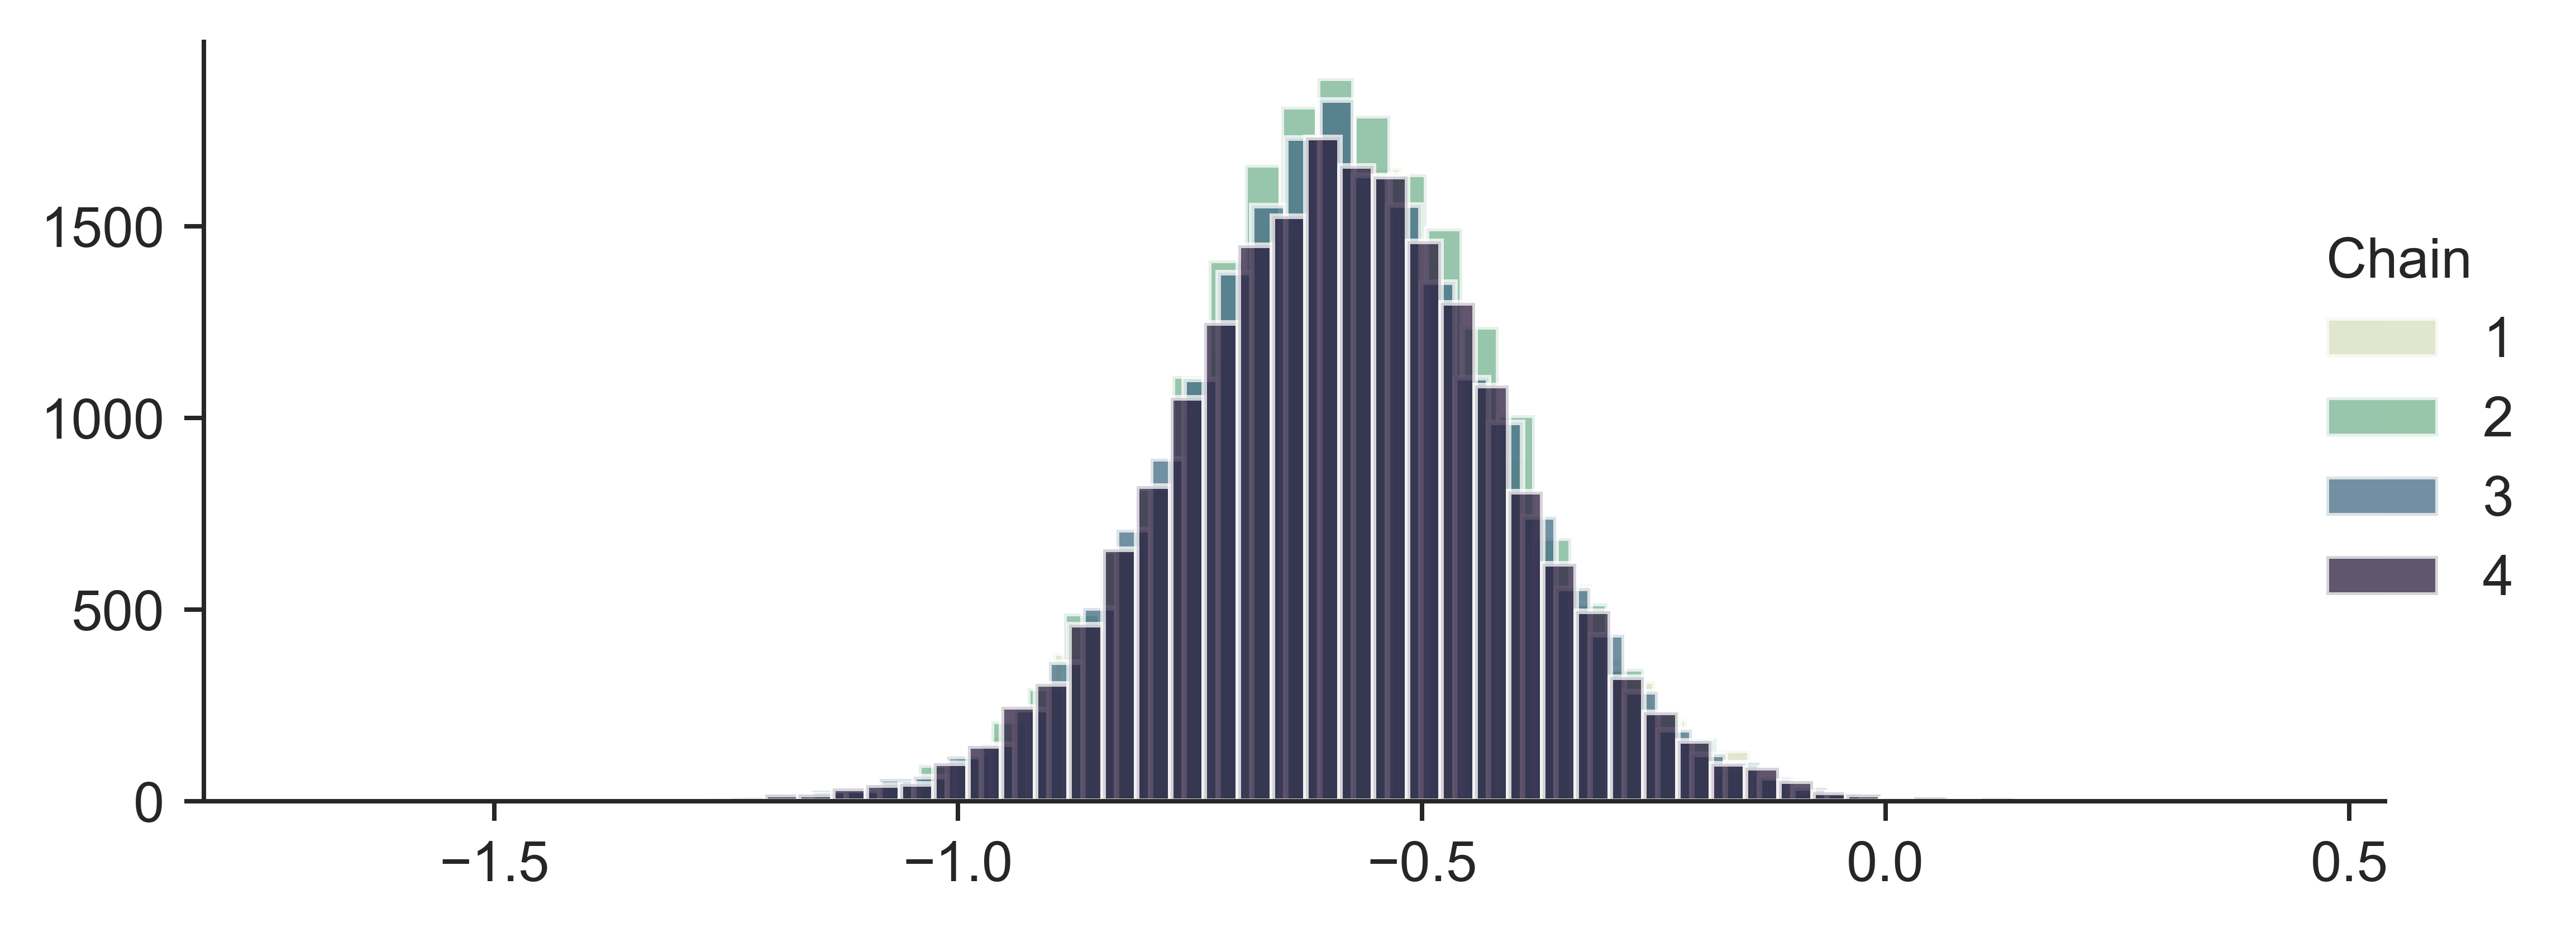

In [44]:
sp.plot_hist(trace, "gamma", 1, "");

In [45]:
data['gamma']

array([-0.59391366, -0.06117564])

In [47]:
numpy.mean(trace['gamma'], 0)

array([-0.16282134, -0.58602441])

In [48]:
numpy.mean(trace['z'], 0)

array([0.2466 , 0.60005])

## Small MRF model

In [92]:
trace_dir = "../results/small_mrf_model_trace"
with open(data_file, "rb") as fh:
    data = pickle.load(fh)

In [93]:
readout = pd.read_csv(readout_file, sep="\t")
graph, _ = _read_graph(graph_file, readout)

In [94]:
with HLM(readout, model="mrf", graph=graph) as model:
    trace = pm.load_trace(trace_dir, model = model.model)

Building mrf hierarchical model


In [95]:
trace['z'].shape

(80000, 2)

In [96]:
data['gamma']

array([-1.        , -0.06117564])

In [97]:
numpy.mean(trace['gamma'], 0)

array([-0.09358205, -1.00153897])

In [98]:
numpy.mean(trace['z'], 0)

array([0.4553875, 0.6135875])

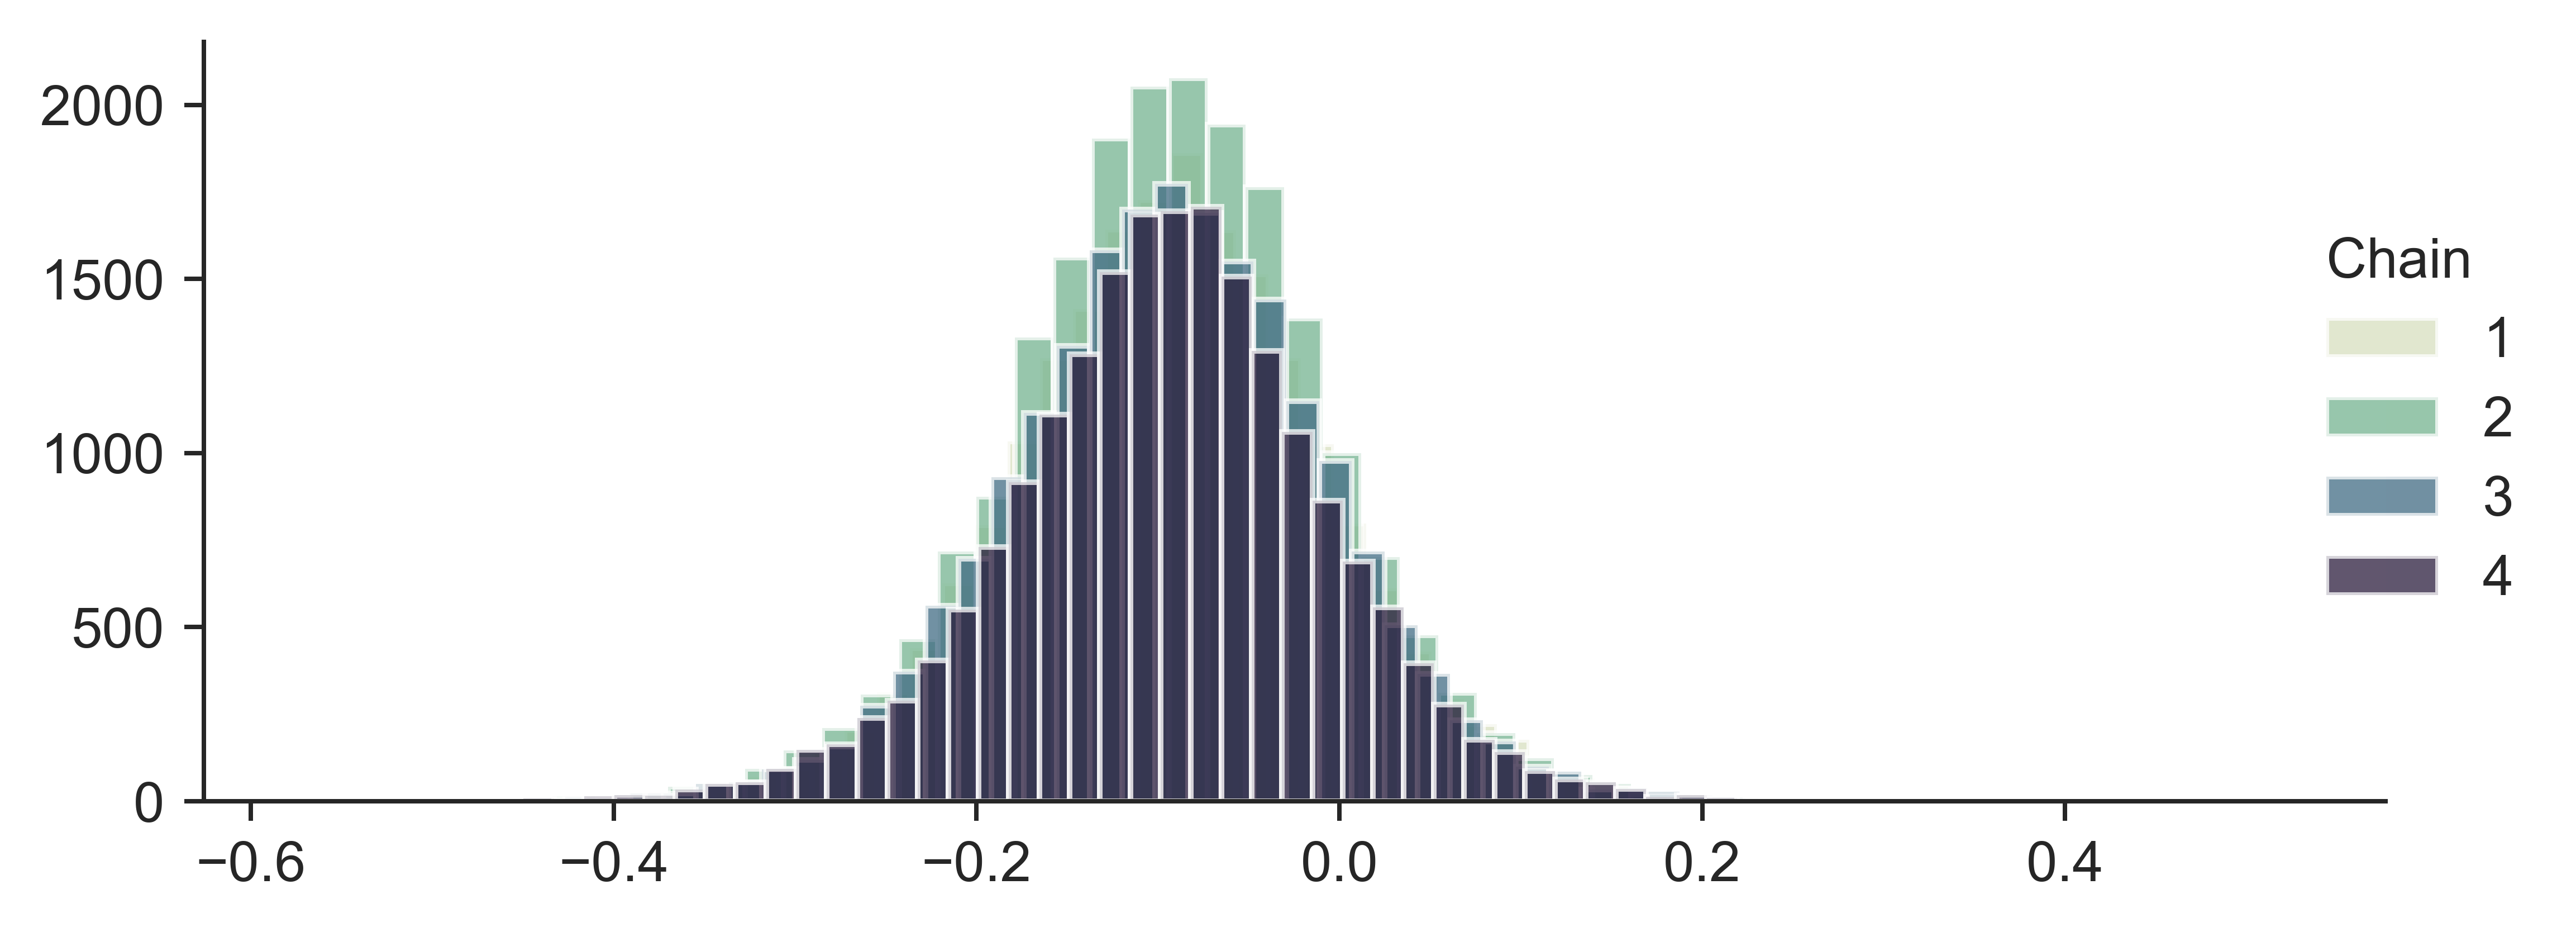

In [99]:
sp.plot_hist(trace, "gamma", 0, "");

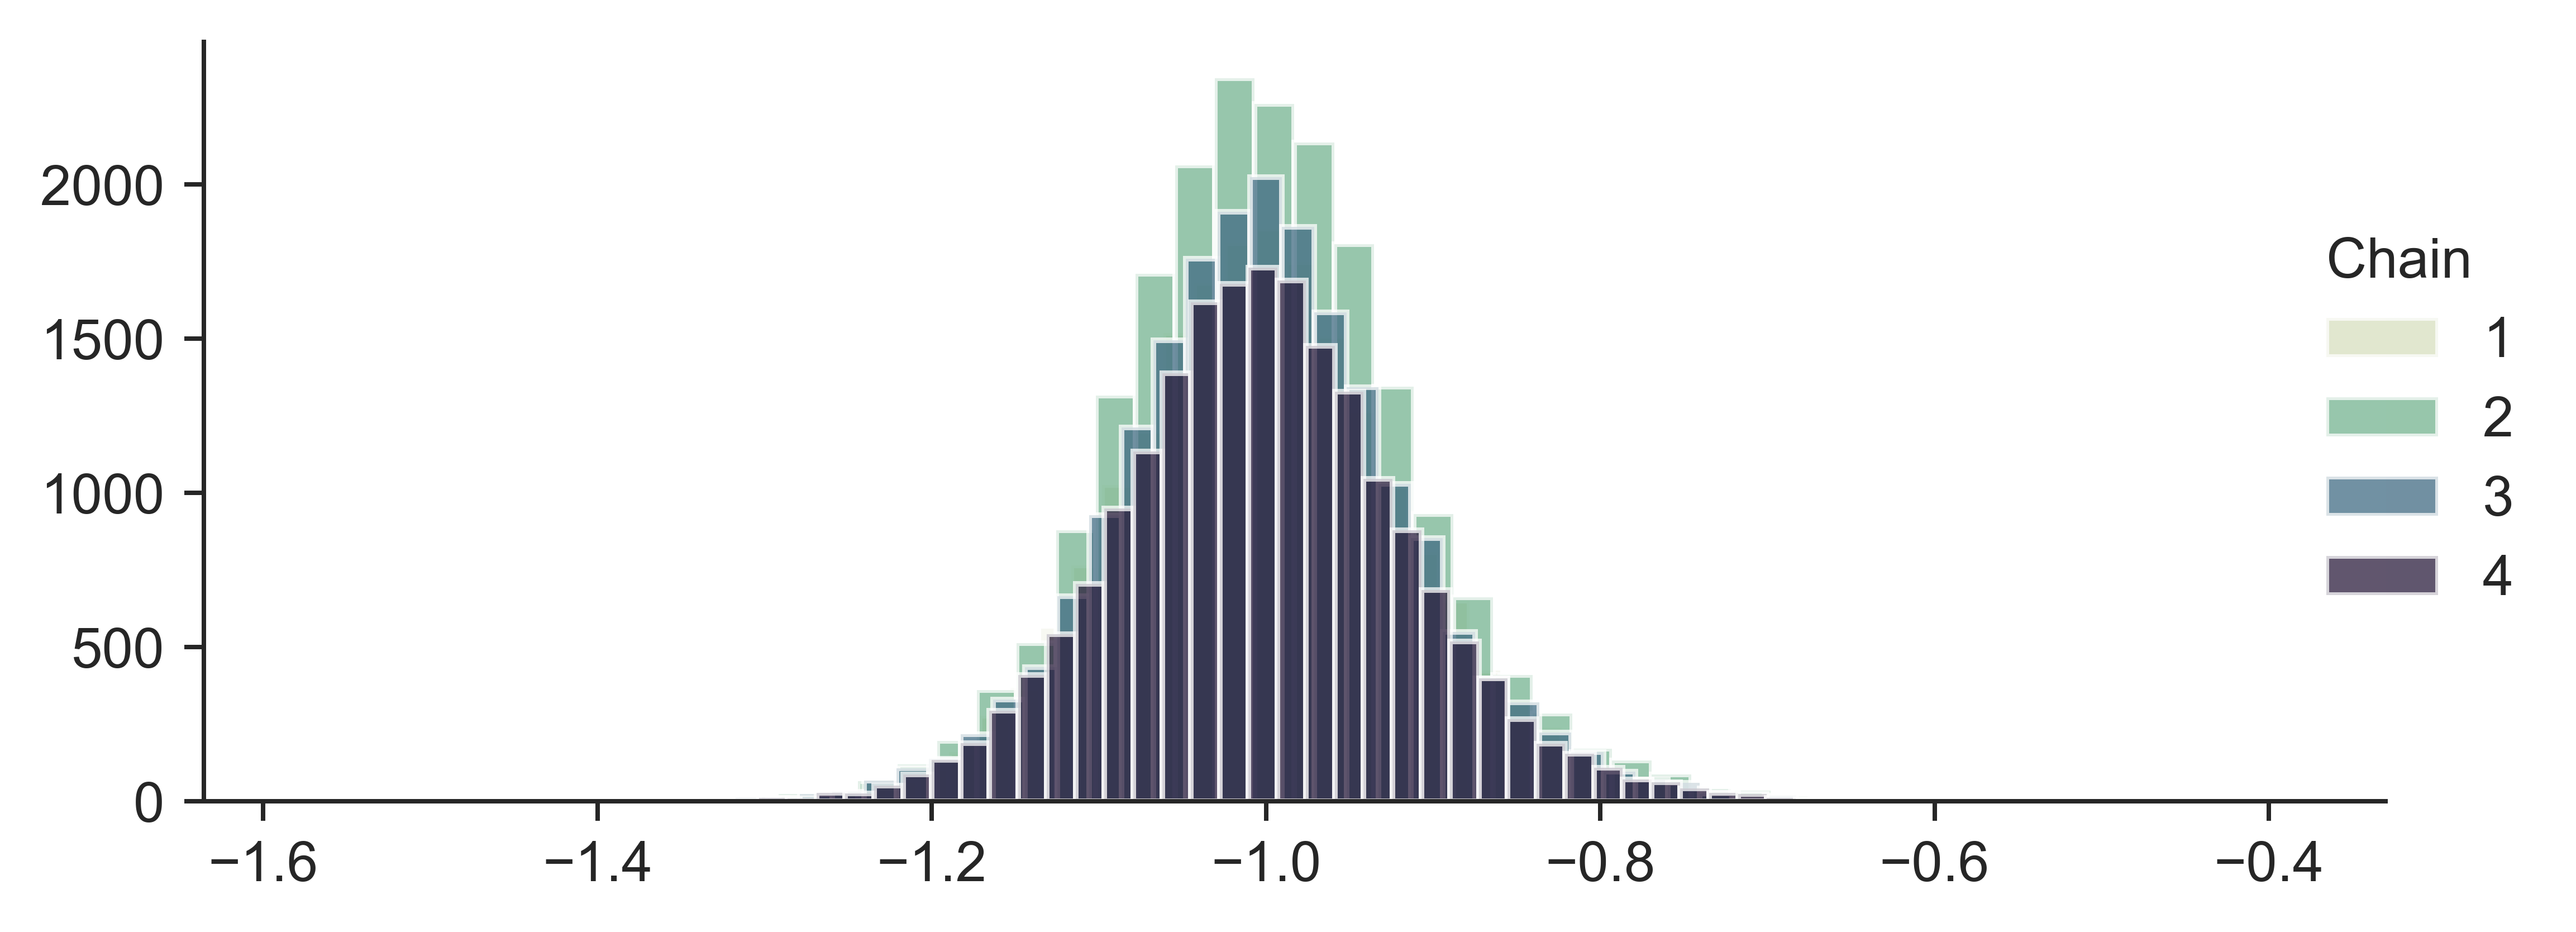

In [100]:
sp.plot_hist(trace, "gamma", 1, "");

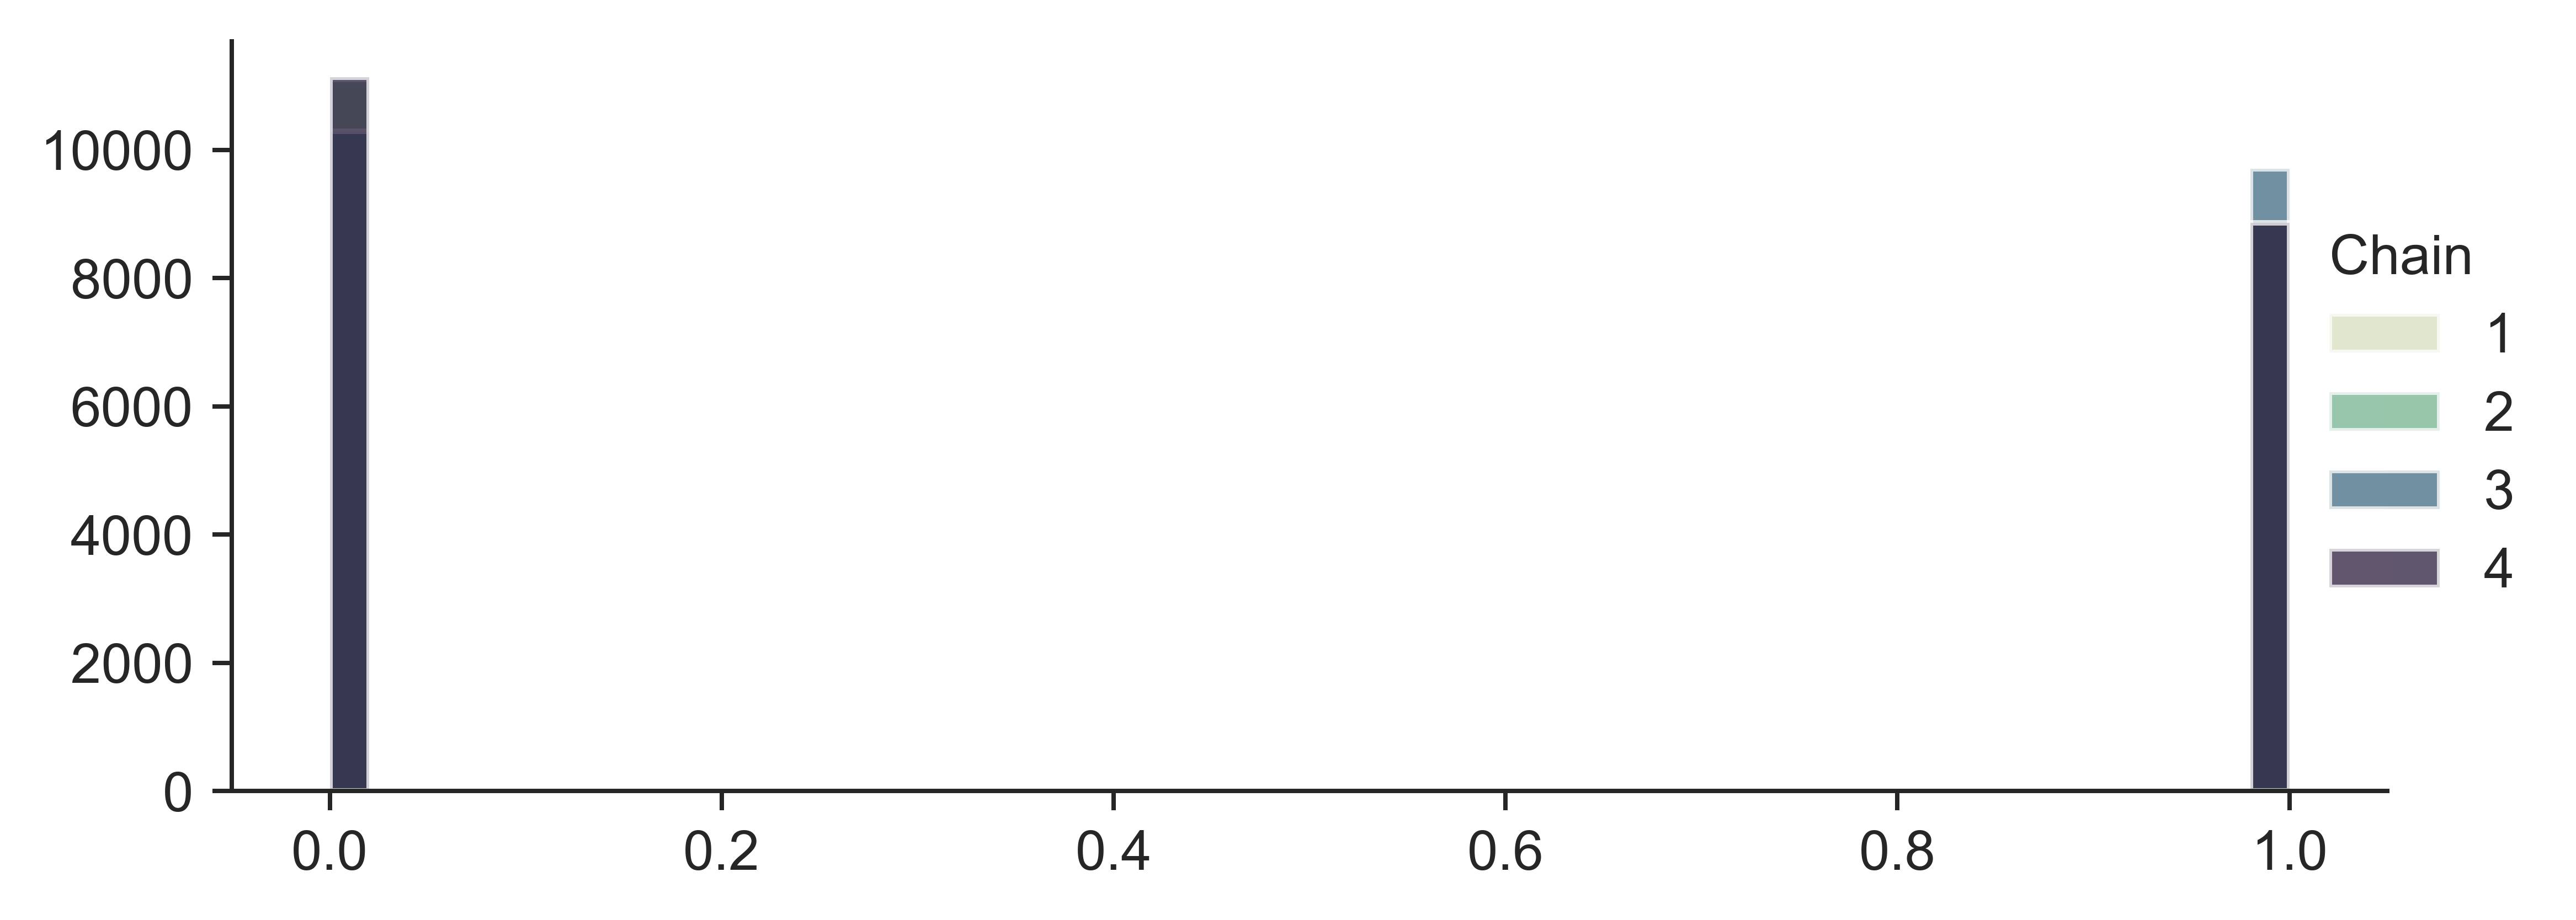

In [101]:
sp.plot_hist(trace, "z", 0, "");

IndexError: index 1 is out of bounds for axis 1 with size 1

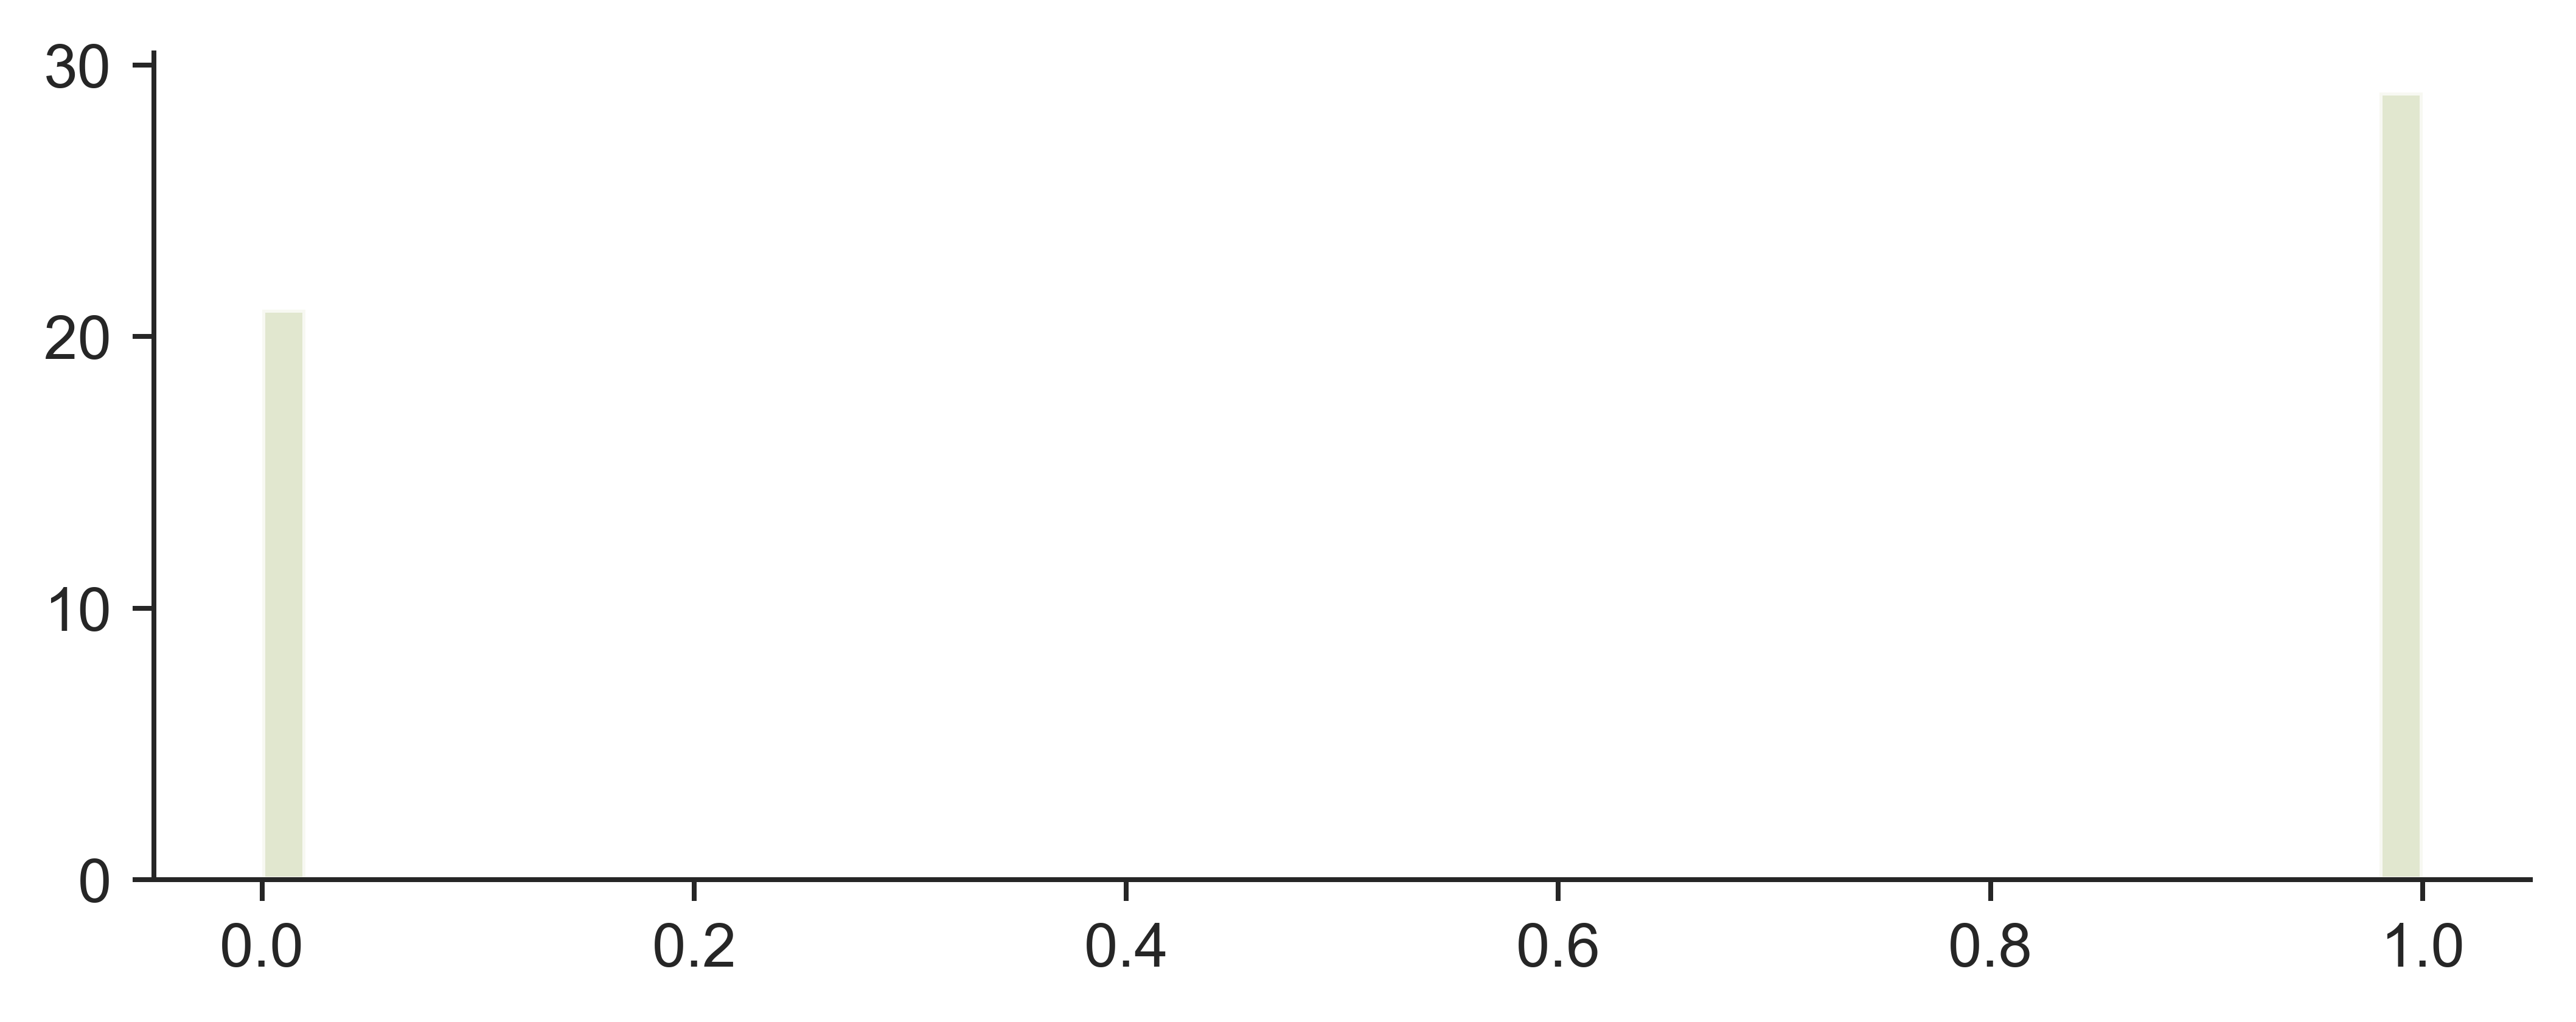

In [39]:
sp.plot_hist(trace, "z", 1, "");

## Simple model

/home/simon/miniconda3/envs/ml/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


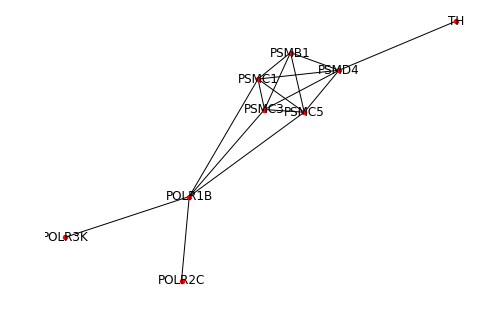

In [52]:
networkx.draw(graph.subgraph(data['essential_genes']), with_labels=True, node_size=20)